## Centroid Models Assignment

In [1]:
# import pandas
import pandas as pd

# import Kmeans 
from sklearn.cluster import KMeans

# import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

# set figure size
plt.rcParams["figure.figsize"] = (12,8)

In [2]:
# Load dataframe
df = pd.read_csv('https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv')

**Take some time to explore the dataframe above.**

In [3]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df[['Annual Income (k$)', 'Spending Score (1-100)']].to_numpy()

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

----------------------
## Objective: 
#### 1. Fit K-Means, 
#### 2. Find the optimal number of clusters using the elbow rule and plot the clusters.


It may be difficult to visualize clusters on dataframes with many features. To simplify the task, we can plot the clusters in 2-D, by creating a clustering model on the last two columns of the dataset. 

> **Note:** There are ways to lower the dimension of your data so it can plotted in two dimensions and we will get to those in the beginning of next week.

We shouldn't forget to scale the data using some technique from sklearn, even though it's **not a must** in the case because we take only the last two columns, and they have already have similar scale.


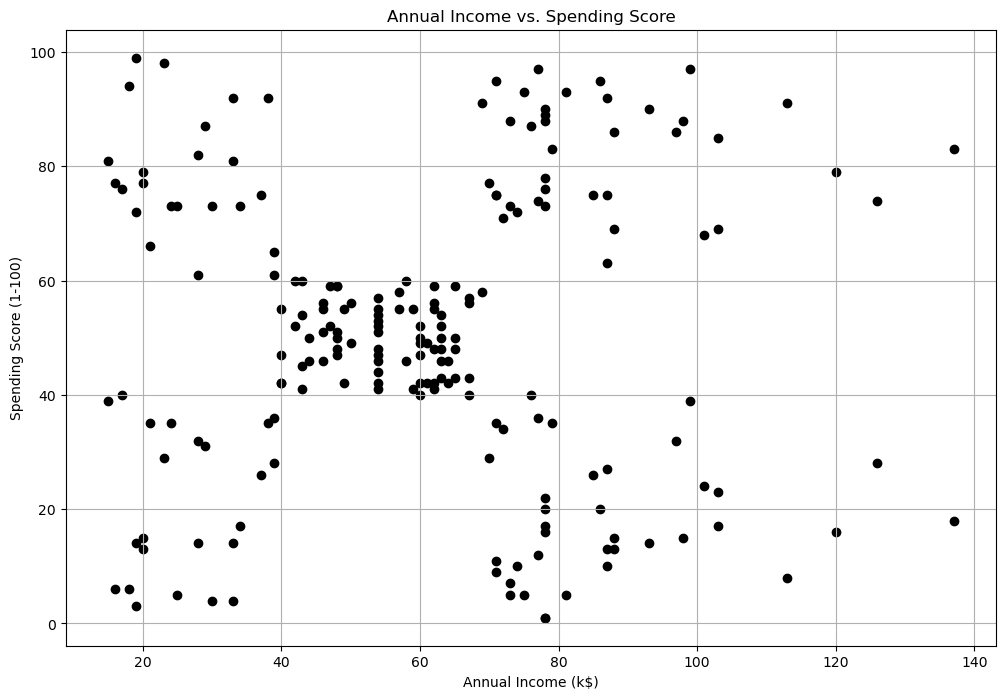

In [6]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
                    c= 'black', marker = 'o')

plt.title('Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid()
plt.show()

In [7]:
# guessing there are 5 clusters, but there are some outliers

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

km = KMeans(n_clusters = 5, n_init = 10, random_state = 0)

data_array = df[['Annual Income (k$)', 'Spending Score (1-100)']].to_numpy()

scaled_data = scaler.fit_transform(data_array)

In [8]:
y_km = km.fit_predict(scaled_data)

- elbow rule

In [9]:
# define a function for elbow rule
def plot_distortion(X, max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters+1):
        km = KMeans(n_clusters=i,
                    init = 'k-means++',
                    n_init=10,
                    random_state = 0)
        km.fit(X)
        distortions.append(km.inertia_)
    
    plt.plot(range(1,max_clusters+1), distortions, marker ='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

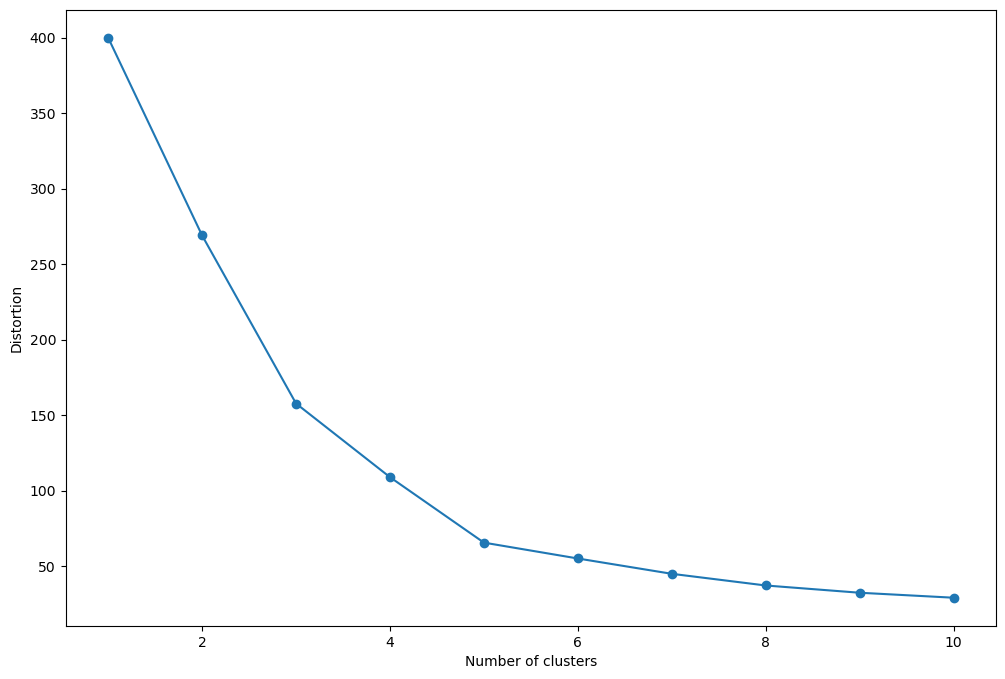

In [10]:
plot_distortion(scaled_data)

# either 3 clusters or 5 clusters where there is a big change in distortion

* fit model with optimal number of clusters

In [11]:
five_km = KMeans(n_clusters = 5, n_init = 10, random_state = 0)

In [12]:
y_km = five_km.fit_predict(scaled_data)

* define function plot_clusters

In [13]:
def plot_clusters(X, y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster, 0]
        y = X[y_res == cluster, 1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x, y, s = 50, marker='s', label = f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker ='*',
                    c='red',
                    s=250,
                    label = 'centroids')
    
    plt.legend()
    plt.grid()
    plt.show()

* plot clusters

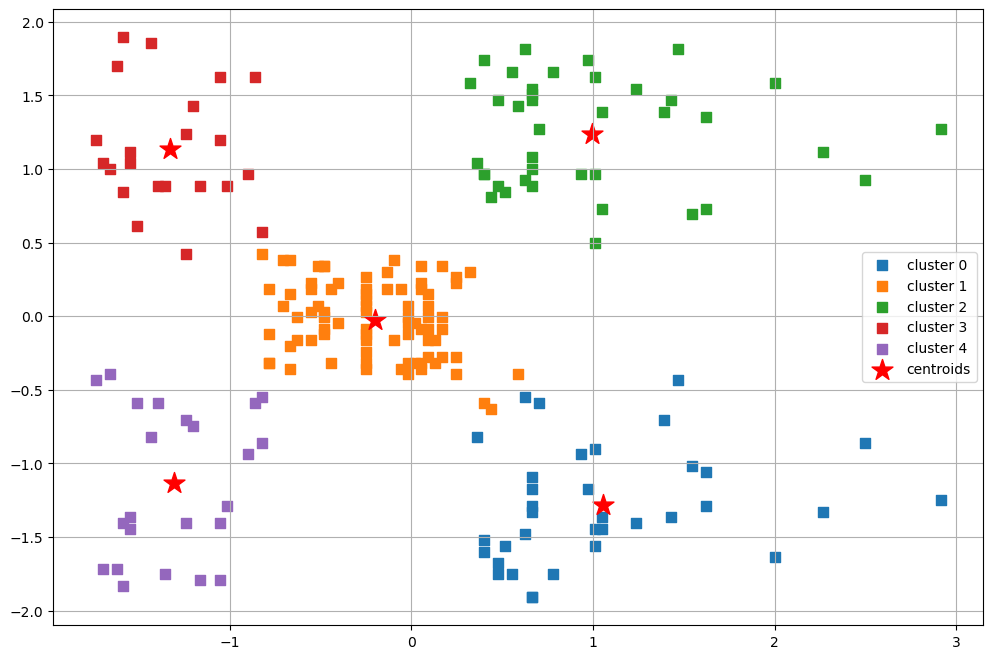

In [14]:
plot_clusters(scaled_data, y_km, plt_cluster_centers=True)

In [15]:
# try with 3 clusters

three_km = KMeans(n_clusters = 3, n_init = 10, random_state = 0)

y_km = three_km.fit_predict(scaled_data)

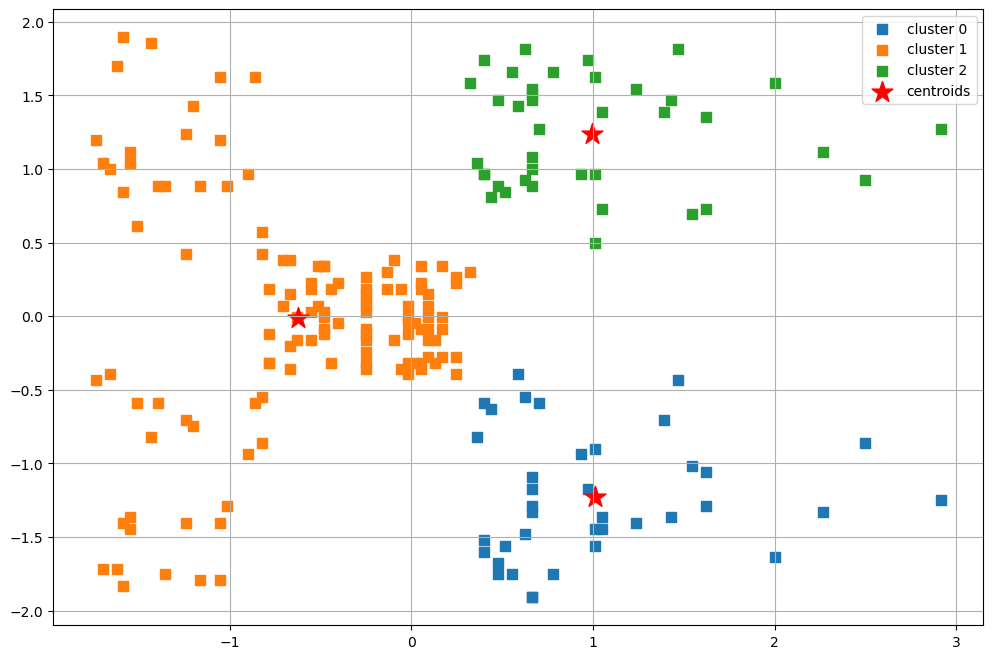

In [16]:
plot_clusters(scaled_data, y_km, plt_cluster_centers=True)